In [75]:
#----scikit---
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scikitplot as skplt

from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, datasets
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier #more ensemble methods to be tested
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec


#df = pd.read_csv(r'labeled_I_PD_THETA_new.csv') #2D
df = pd.read_csv(r'labeled_O_Q_FB_FI_EST.csv')

#2D
#df = df.dropna()
#df = df[(df.PD3 < 2) & (df.PD3 > 0) & (df.PD6 < 2) & (df.PD6 > 0)]


#2D
#tr_input1 = np.array([df.PD6,df.PD3])
#print(tr_input1.shape)
#tr_output1 = np.array(df.OPTICAL_RX_STATE)
#tr_input1 = np.transpose(tr_input1)

#3D
tr_input_3D = np.array([df.x_euler, df.y_euler, df.z_euler])
tr_input_3D = np.transpose(tr_input_3D)
tr_output_3D = np.array(df.OPTICAL_RX_STATE)

#4D
tr_input_4D = np.array([df.w, df.x, df.y, df.z])
tr_input_4D = np.transpose(tr_input_4D)
tr_output_4D = np.array(df.OPTICAL_RX_STATE)


In [78]:
#train
X_3D = tr_input_3D
y_3D = tr_output_3D
X_4D = tr_input_4D
y_4D = tr_output_4D

#print(X.shape)
#print(y.shape)

X_train_3D, X_test_3D, y_train_3D, y_test_3D = train_test_split(X_3D, y_3D, test_size=0.20, random_state=42)
X_train_4D, X_test_4D, y_train_4D, y_test_4D = train_test_split(X_4D, y_4D, test_size=0.20, random_state=42)

#scaler = StandardScaler()
#X_train_4D = scaler.fit_transform(X_train_4D)
#pca = PCA(n_components=3)
#pca.fit_transform(X_train_4D)
#pca_variance = pca.explained_variance_
#plt.figure(figsize=(8, 6))
#plt.bar(range(3), pca_variance, alpha=0.5, align='center', label='individual variance')
#plt.legend()
#plt.ylabel('Variance ratio')
#plt.xlabel('Principal components')
#plt.show()

#various models - configuration 

#first do hyperparam tuning for each model, then evaluate and compare the best - or find the best method and tune for this one 

models = [KNeighborsClassifier(n_neighbors=10,weights='uniform',algorithm='auto',leaf_size=10,p=2),
          GaussianNB(),
          LinearDiscriminantAnalysis(solver = 'lsqr'), 
          svm.SVC(kernel='rbf'), #for kernel = 'rbf', play with gamma and c
          LogisticRegression(),
          RandomForestClassifier(n_estimators=5, max_depth=8, random_state=1),
          MLPClassifier(hidden_layer_sizes = 120, activation = 'tanh', solver = 'adam', learning_rate = 'adaptive')
         ]

#2D
#gs = gridspec.GridSpec(4, 2)
#fig = plt.figure(figsize=(14,10))
fit_t = []

labels = ['KNN','Gaussian NB', 'Lin. Discr. Analysis', 'SVC','Logistic Regression', 'Random Forest Class.', 'MLP']
for clf, lab, grd in zip(models,
                         labels,
                         [(0,0), (0,1), (1,0), (1,1), (2,0), (2,1),(3,1)]):
    fit_t.append(clf.fit(X_train_3D, y_train_3D))
    #2D
    #ax = plt.subplot(gs[grd[0], grd[1]])
    #fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    #plt.title(lab)
#plt.show()


c:\users\evridiki ntagiou\.conda\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


KNN
0.9476987447698745
[[210  32]
 [ 18 696]]
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       242
           1       0.96      0.97      0.97       714

    accuracy                           0.95       956
   macro avg       0.94      0.92      0.93       956
weighted avg       0.95      0.95      0.95       956



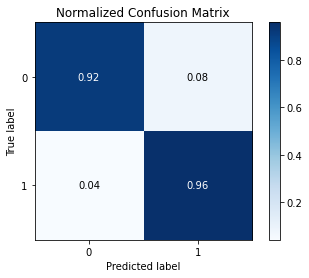

Gaussian NB
0.7656903765690377
[[  6   2]
 [222 726]]
              precision    recall  f1-score   support

           0       0.03      0.75      0.05         8
           1       1.00      0.77      0.87       948

    accuracy                           0.77       956
   macro avg       0.51      0.76      0.46       956
weighted avg       0.99      0.77      0.86       956



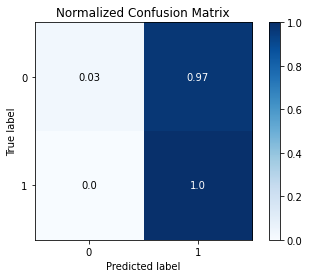

Lin. Discr. Analysis
0.7615062761506276
[[  0   0]
 [228 728]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.76      0.86       956

    accuracy                           0.76       956
   macro avg       0.50      0.38      0.43       956
weighted avg       1.00      0.76      0.86       956



c:\users\evridiki ntagiou\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\evridiki ntagiou\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\evridiki ntagiou\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


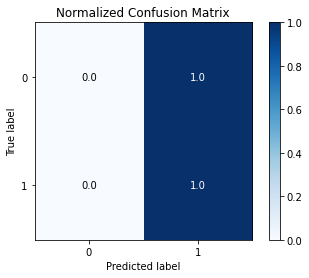

SVC
0.9006276150627615
[[176  43]
 [ 52 685]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       219
           1       0.94      0.93      0.94       737

    accuracy                           0.90       956
   macro avg       0.86      0.87      0.86       956
weighted avg       0.90      0.90      0.90       956



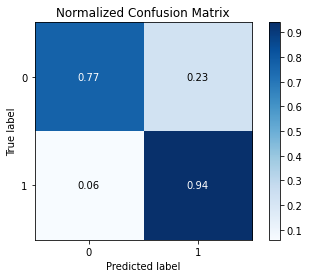

Logistic Regression
0.7615062761506276
[[  0   0]
 [228 728]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.76      0.86       956

    accuracy                           0.76       956
   macro avg       0.50      0.38      0.43       956
weighted avg       1.00      0.76      0.86       956



c:\users\evridiki ntagiou\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\evridiki ntagiou\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\evridiki ntagiou\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


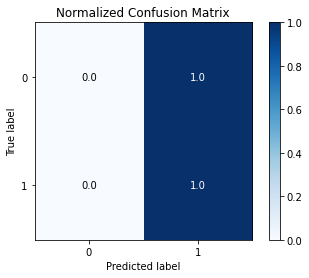

Random Forest Class.
0.8922594142259415
[[157  32]
 [ 71 696]]
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       189
           1       0.96      0.91      0.93       767

    accuracy                           0.89       956
   macro avg       0.82      0.87      0.84       956
weighted avg       0.90      0.89      0.90       956



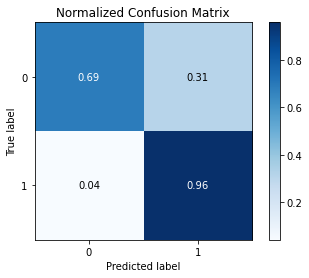

MLP
0.9142259414225942
[[183  37]
 [ 45 691]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       220
           1       0.95      0.94      0.94       736

    accuracy                           0.91       956
   macro avg       0.88      0.89      0.88       956
weighted avg       0.92      0.91      0.91       956



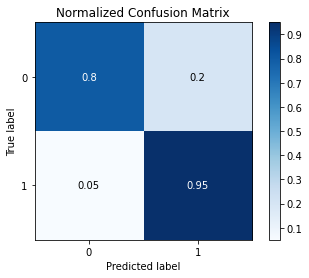

In [79]:
#Evaluating

for index, f in enumerate(fit_t):
    prediction = f.predict(X_test_3D)
    print(labels[index])
    print(accuracy_score(prediction,y_test_3D))
    print(confusion_matrix(prediction,y_test_3D))
    print(classification_report(prediction, y_test_3D))
    skplt.metrics.plot_confusion_matrix(y_test_3D, prediction, normalize=True)
    plt.show()
    